# Beam Diff Tool
This notebook demonstrates the use of the beam diff tools in this package. These tools allow a user to compare two beams stored in `ParticleGroup` objects from the OpenPMD-beamphysics package.

The function `joint_and_marginal_diff` will create a figure similar to `ParticleGroup.plot(...)`. The marginal densities of both beams being compared are shown on the top and side of the figure. In the center, the contours of the joint distributions of both beams are shown with colors used to distinguish which is which. The difference in their joint densities is also shown using a diverging colormap. Kernel density estimation is used to calculate the density of the beam at points in phase space.

The helper function `phase_space_diff` constructs a single figure containing difference plots of all three phase space projections of the beam: x/px, y/py, and t/energy.

In [1]:
from electronsandstuff.pmd_beamphysics.beam_diff import (
    joint_and_marginal_diff,
    phase_space_diff,
)
from pmd_beamphysics import ParticleGroup

10000


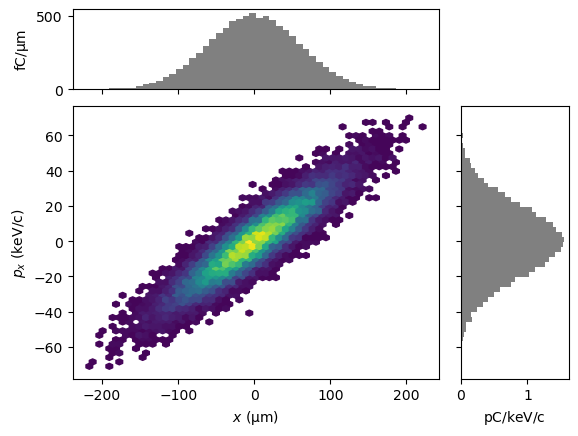

In [2]:
# Load example particle group (from OpenPMD-Beamphysics documentation)
pg1 = ParticleGroup("data/bmad_particles.h5")
print(len(pg1))

# Let's see what it looks like
pg1.plot("x", "px")

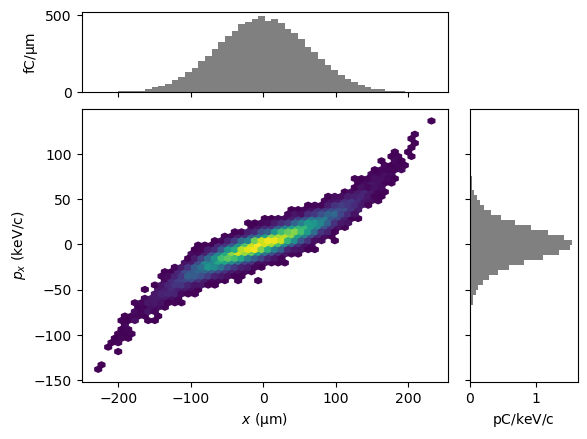

In [3]:
# Produce a modified beam
pg2 = pg1.copy()
pg2.x = pg2.x * 1.05
pg2.px = pg2.px * 0.95
pg2.px += pg2.x**3 * 6e15

# Display the new phase space
pg2.plot("x", "px")

(<Figure size 600x400 with 3 Axes>,
 {'joint': <Axes: xlabel='$x~(\\mathrm{ µm } )$', ylabel='$p_x~(\\mathrm{ keV/c } )$'>,
  'marginal_x': <Axes: >,
  'marginal_y': <Axes: >})

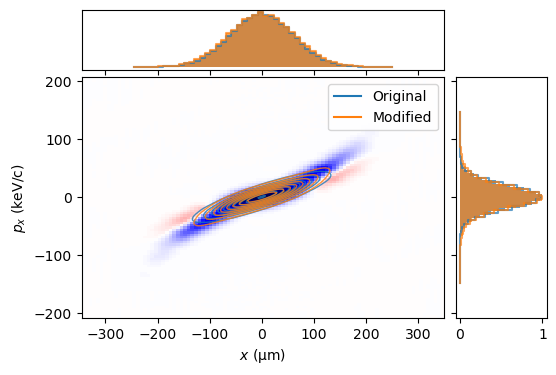

In [4]:
# Compare the two
joint_and_marginal_diff(pg1, pg2, "x", "px", label_a="Original", label_b="Modified")

(<Figure size 1800x600 with 9 Axes>,
 {'x_px': {'joint': <Axes: xlabel='$x~(\\mathrm{ µm } )$', ylabel='$p_x~(\\mathrm{ keV/c } )$'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >},
  'y_py': {'joint': <Axes: xlabel='$y~(\\mathrm{ µm } )$', ylabel='$p_y~(\\mathrm{ keV/c } )$'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >},
  'delta_t_delta_energy': {'joint': <Axes: xlabel='$t - \\left<t\\right>~(\\mathrm{ ps } )$', ylabel='$E - \\left<E\\right>~(\\mathrm{ keV } )$'>,
   'marginal_x': <Axes: >,
   'marginal_y': <Axes: >}})

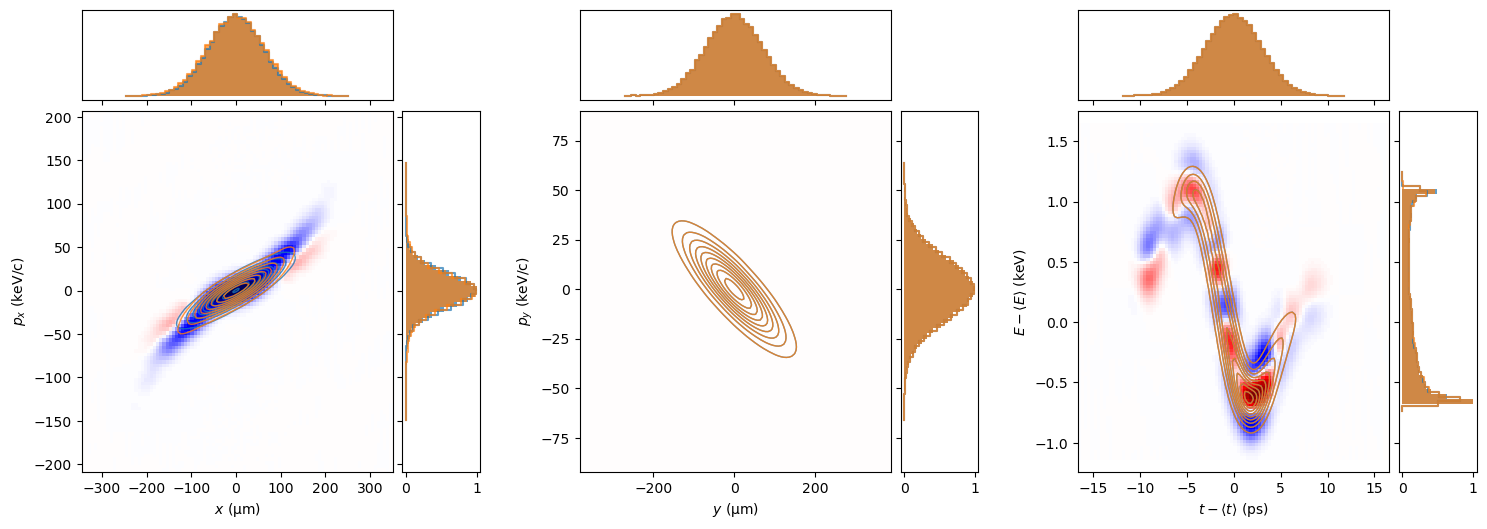

In [5]:
# Show all of the phase space coordinates
phase_space_diff(pg1, pg2)